# 2A.soft - R et notebooks

Exécuter du code [R](https://cran.r-project.org/) depuis un notebook python avec le module [rpy2](https://rpy2.readthedocs.io/en/version_2.8.x/).

<!--RST ..index:: R !RST-->

Tout d'abord, il faut ajouter les variables d'environnement suivantes et si besoin relancer le notebook pour que les modifications soient prises en compte. Il faut mettre à jour ce code en fonction de la version R installée. Elle doit correspondre à celle utilisée pour créer le package *rpy2*.

In [ ]:
import os, sys
if sys.platform.startswith("win"):
    if os.environ.get("R_LIBS_USER") is None:
        os.environ["R_LIBS_USER"] = os.path.join(os.environ["USERPROFILE"], "Documents")
    if os.environ.get("R_USER") is None:
        os.environ["R_USER"] = os.path.join(os.environ["USERPROFILE"], "Documents")

In [ ]:
import os, sys
if sys.platform.startswith("win"):
    print("local version:", os.listdir(r"C:\Program Files\R"))
    version = os.listdir(r"C:\Program Files\R")[-1]
    p = [ os.environ.get("R_HOME", "R_HOME is empty, example: C:\\Program Files\\R\\R-3.3.3"), 
          os.environ.get ("R_LIBS_USER", "R_LIBS_USER is empty, example: %USERPROFILE%\\Documents"), 
          os.environ.get ("R_USER", "R_USER is empty, example: %USERPROFILE%\\Documents") ]
    print([ _.replace(os.environ["USERPROFILE"],"%USERPROFILE%") for _ in p ])
    ok = [_ for _ in p if version in _]
    if len(ok) == 0:
        raise Exception("version '{0}' not found in {1}".format(version, p))

local version: ['R-3.3.3']
['R_HOME is empty, example: C:\\Program Files\\R\\R-3.3.3', '%USERPROFILE%\\Documents', '%USERPROFILE%\\Documents']


Un autre petit préliminaire agaçant sur Windows. Lorsqu'on exécute l'instruction ``%load_ext rpy2.ipython`` ou ``import win32api``, on obtient parfois l'exception ``ImportError: DLL load failed: Le module spécifié est introuvable.`` Ceci explique la présence des deux premières lignes du code qui suit.

In [ ]:
from pyquickhelper.helpgen.utils_pywin32 import import_pywin32
import_pywin32()
import rpy2
rpy2.__version__

'2.8.6'

In [ ]:
from rpy2.rinterface import R_VERSION_BUILD
R_VERSION_BUILD

('3', '3.3', '', 72310)

In [ ]:
%load_ext rpy2.ipython  

In [ ]:
%%R -o x

x <- version

In [ ]:
for _ in x:
    print(_)

[1] "x86_64-w64-mingw32"

[1] "x86_64"

[1] "mingw32"

[1] "x86_64, mingw32"

[1] ""

[1] "3"

[1] "3.3"

[1] "2017"

[1] "03"

[1] "06"

[1] "72310"

[1] "R"

[1] "R version 3.3.3 (2017-03-06)"

[1] "Another Canoe"



Ce notebook utilise les outils présentés ici : [rmagic](http://rpy2.readthedocs.io/en/version_2.7.x/interactive.html?highlight=rmagic).

**Important :** sous Windows, le module [rpy2](http://rpy2.readthedocs.io/en/) est habituellement installé avec un setup (voir [setup pour rpy2](http://www.lfd.uci.edu/~gohlke/pythonlibs/#rpy2)). Il est compilé pour une version spécifique de Python et une version spécifique de R qui doit être installée. Des erreurs se produisent si les versions ne correspondent pas.

On cherche à exécuter le code proposé ici : [Convolution(s) et lois composées, aspects numériques](http://freakonometrics.hypotheses.org/1813) qui requiert la librairie [actuar](http://cran.r-project.org/web/packages/actuar/index.html) qu'il faut installer si cela n'a pas été fait.

Le code suivant définit le source de téléchargement par défaut pour les packages R de façon à éviter l'affichage d'une fenêtre popup poru le choisir (voir [Installing R packages](http://www.r-bloggers.com/installing-r-packages/)).

In [ ]:
%%R
cat(".Rprofile: Setting UK repository")
r = getOption("repos") 
r["CRAN"] = "http://cran.uk.r-project.org"
options(repos = r)
rm(r)

Le code suivant installe effectivement le package. On peut vérifier que le package est disponible pour la version de R considérée : [actuar](https://cran.r-project.org/web/packages/actuar/index.html).

In [ ]:
%%R
# install.packages("actuar", quiet=TRUE)
install.packages('actuar')

Cette commande a l'inconvénient d'ouvrir une fenêtre pop up pour sélectionner le site du téléchargement du package. Cela ne fonctionnera pas sur un serveur de notebook. Certaines des commandes suivantes peuvent échouer pour les mêmes raisons. On peut vérifier que l'import du package a fonctionné avec le programme suivant :

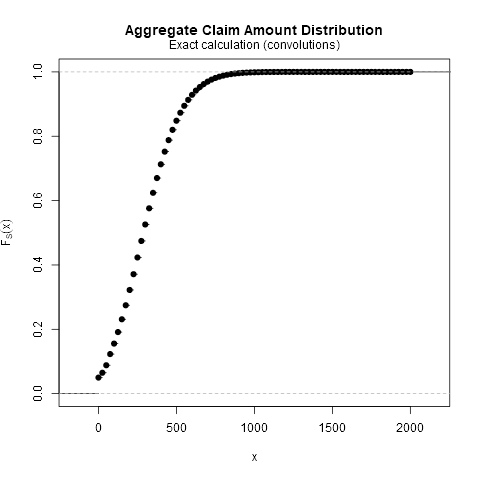

In [ ]:
%%R -o fx,x
library("actuar")
fx <- c(0, 0.15, 0.2, 0.25, 0.125, 0.075, 0.05, 0.05, 0.05, 0.025, 0.025)
pn <- c(0.05, 0.1, 0.15, 0.2, 0.25, 0.15, 0.06, 0.03, 0.01)
Fs <- aggregateDist("convolution", model.freq = pn, model.sev = fx, x.scale = 25)
x <- c(Fs(0), diff(Fs(25 * 0:21)))
print(summary(fx))
plot(Fs)

On peut extraire la variable ``x`` :

In [ ]:
%Rget x

array([ 0.05      ,  0.015     ,  0.023375  ,  0.034675  ,  0.03257656,
        0.03578639,  0.03980787,  0.04356232,  0.047518  ,  0.0490338 ,
        0.05189806,  0.05137886,  0.05118691,  0.05030486,  0.04818189,
        0.04575882,  0.0428089 ,  0.03937836,  0.03574568,  0.03196808,
        0.02832446,  0.02478833])

Quelques notebooks à lire pour aller plus loin :

* [Four issues I had when using IPython, R and rmagic](http://www.xavierdupre.fr/blog/2014-09-07_nojs.html)
* [Example of using ggplot2 from Jupyter notebook](http://nbviewer.jupyter.org/gist/yoavram/5280132)
* [Rmagic Functions Extension](http://nbviewer.jupyter.org/github/jupyter/jupyter/blob/3607712653c66d63e0d7f13f073bde8c0f209ba8/docs/examples/notebooks/rmagic_extension.ipynb)

On peut sauver son workspace et le récupérer sous R si besoin.

In [ ]:
%%R
save.image("C:\\temp\\python2.RData")

On peut également diriger la sortie standard dans un fichier texte pour voir ce qu'il s'y passe.

In [ ]:
%%R

zz <- file("C:\\temp\\rlog.txt", open = "wt");
sink(zz);
sink(zz, type = "message");

In [ ]:
%load_ext pyensae

The pyensae extension is already loaded. To reload it, use:
  %reload_ext pyensae


In [ ]:
%tail c:/temp/rlog.txt